In [1]:
!pip install python-graphviz -y

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: 'python-graphviz\xa0-y'


In [2]:
!conda install python-graphviz -y



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: D:\anaconda3





Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.2               |       hd77b12b_6         109 KB
    libgd-2.3.3                |       ha43c60c_1        

In [3]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable


  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=144749ca04b680085a7e82aa8d501abd098c532d41adaca8dbee53a8747e7b09
  Stored in directory: c:\users\user dk\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


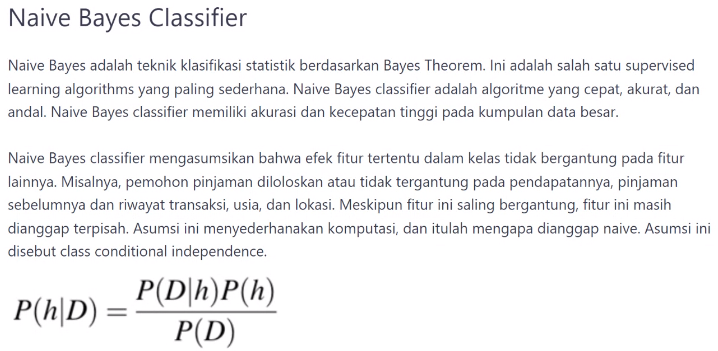

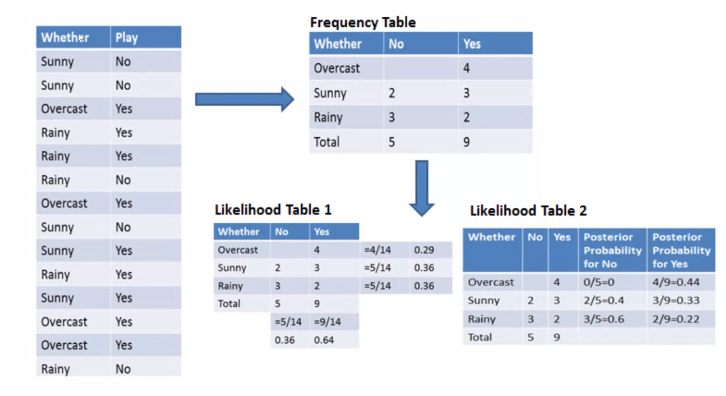

In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

## Naive Bayes Classifier

In [5]:
#Feature 1
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy',
          'Sunny','Overcast','Overcast','Rainy']
# Feature 2
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool',
       'Mild','Mild','Mild','Hot','Mild']

# Label atau target
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

print(len(weather),len(temp),len(play))

14 14 14


### Encode Features

In [6]:
le = LabelEncoder()

w_enc = le.fit_transform(weather)
t_enc = le.fit_transform(temp)
p_enc = le.fit_transform(play)

In [7]:
w_enc

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1], dtype=int64)

In [8]:
t_enc

array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2], dtype=int64)

In [9]:
p_enc

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [10]:
features = list(zip(w_enc,t_enc))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [11]:
np.array(features).shape

(14, 2)

### Model Building

In [12]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()

### Model Fitting

In [13]:
modelNB.fit(features,p_enc)

modelNB.predict([[0,2]]) #Overcast, Mild

array([1], dtype=int64)

In [14]:
modelNB.score(features,p_enc)

0.7142857142857143

## Naive Bayes Multiple Labels

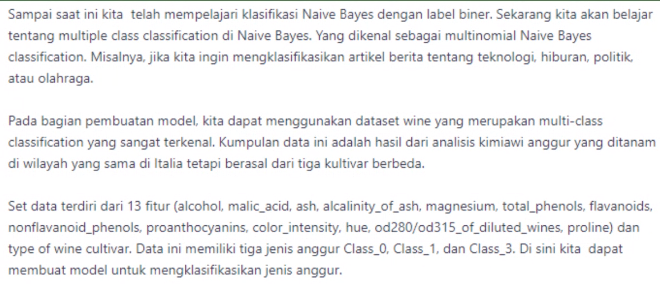

In [15]:
from sklearn.datasets import load_wine

wine = load_wine()

In [16]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [17]:
# nama label/target data
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [18]:
wine.data.shape

(178, 13)

In [19]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [20]:
# Value Target
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Splitting Data

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
#30%test, 70%train
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=2024)

In [25]:
modelNB2 = GaussianNB()
modelNB2.fit(X_train, y_train)

y_pred_test = modelNB2.predict(X_test)

In [26]:
y_pred_test

array([2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1,
       2, 1, 0, 1, 1, 0, 0, 0, 2, 1])

In [27]:
y_test

array([2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 0, 0, 1, 1, 0, 0, 0, 2, 1])

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [30]:
y_pred_train = modelNB2.predict(X_train)
y_pred_test = modelNB2.predict(X_test)

In [31]:
print('train set Accuracy',accuracy_score(y_train,y_pred_train))
print('test set Accuracy',accuracy_score(y_test,y_pred_test))

train set Accuracy 0.9919354838709677
test set Accuracy 0.9444444444444444


In [35]:
print('train set Classification Report',classification_report(y_train,y_pred_train))
print('test set Classification Report',classification_report(y_test,y_pred_test))

train set Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        51
           2       1.00      1.00      1.00        32

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124

test set Classification Report               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      0.90      0.92        20
           2       0.89      1.00      0.94        16

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



## Decision Tree

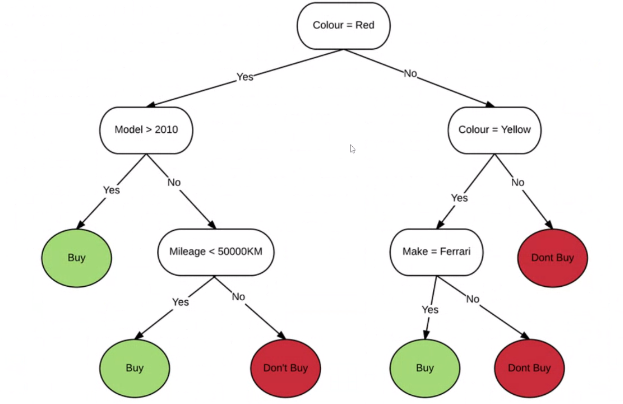

### Build Decision Tree in Sklearn

In [36]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [40]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

pima = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv',header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [41]:
pima.drop(0,inplace=True)

In [42]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [43]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   label     768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [46]:
pima.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [47]:
for i in pima.columns:
    pima[i] = pima[i].astype(float)

In [48]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    float64
 1   glucose   768 non-null    float64
 2   bp        768 non-null    float64
 3   skin      768 non-null    float64
 4   insulin   768 non-null    float64
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    float64
 8   label     768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [49]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [52]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

X = pima[feature_cols]
y = pima['label']

In [53]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2024)

In [54]:
# Build Model

dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [55]:
print('train set \n',classification_report(y_train,y_pred_train))
print('test set \n',classification_report(y_test,y_pred_test))

train set 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       350
         1.0       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

test set 
               precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       150
         1.0       0.55      0.52      0.54        81

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



Model nya overfitting y ges y

### Visualisasikan Decision Tree

In [58]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

In [61]:
dot_data = StringIO()

tree.export_graphviz(dtc, out_file=dot_data,
                    class_names=['0','1'], #nama target
                    feature_names=feature_cols,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

InvocationException: GraphViz's executables not found